In [ ]:
!nvidia-smi

Thu Oct 19 21:01:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    29W /  70W |   3263MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import seaborn as sns
import numpy as np
from torch.utils.data import random_split
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# transform_train = transforms.Compose([
#     transforms.RandomResizedCrop(224),
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# Normalization for testing, no data augmentation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# transform_train = transforms.Compose([
#     transforms.RandomResizedCrop(32, scale=(0.8, 1.0)),
#     transforms.RandomHorizontalFlip(),
#     transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
#     transforms.RandomRotation(20),
#     transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
# ])

# transform_test = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
# ])


batch_size = 8

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=32)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=32)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 8, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


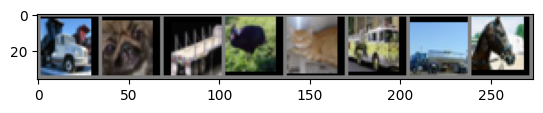

truck dog   truck bird  cat   truck truck horse


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class VGG16_NET(nn.Module):
#     def __init__(self):
#         super(VGG16_NET, self).__init__()
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
#         self.bn1 = nn.BatchNorm2d(64)
#         self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
#         self.bn2 = nn.BatchNorm2d(64)

#         self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
#         self.bn3 = nn.BatchNorm2d(128)
#         self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
#         self.bn4 = nn.BatchNorm2d(128)

#         self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
#         self.bn5 = nn.BatchNorm2d(256)
#         self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
#         self.bn6 = nn.BatchNorm2d(256)
#         self.conv7 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
#         self.bn7 = nn.BatchNorm2d(256)

#         self.conv8 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
#         self.bn8 = nn.BatchNorm2d(512)
#         self.conv9 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
#         self.bn9 = nn.BatchNorm2d(512)
#         self.conv10 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
#         self.bn10 = nn.BatchNorm2d(512)

#         self.conv11 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
#         self.bn11 = nn.BatchNorm2d(512)
#         self.conv12 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
#         self.bn12 = nn.BatchNorm2d(512)
#         self.conv13 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
#         self.bn13 = nn.BatchNorm2d(512)

#         self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

#         self.fc14 = nn.Linear(512, 4096)
#         self.fc15 = nn.Linear(4096, 4096)
#         self.fc16 = nn.Linear(4096, 10)

#     def forward(self, x):
#         x = F.relu(self.bn1(self.conv1(x)))
#         x = F.relu(self.bn2(self.conv2(x)))
#         x = self.maxpool(x)
#         x = F.relu(self.bn3(self.conv3(x)))
#         x = F.relu(self.bn4(self.conv4(x)))
#         x = self.maxpool(x)
#         x = F.relu(self.bn5(self.conv5(x)))
#         x = F.relu(self.bn6(self.conv6(x)))
#         x = F.relu(self.bn7(self.conv7(x)))
#         x = self.maxpool(x)
#         x = F.relu(self.bn8(self.conv8(x)))
#         x = F.relu(self.bn9(self.conv9(x)))
#         x = F.relu(self.bn10(self.conv10(x)))
#         x = self.maxpool(x)
#         x = F.relu(self.bn11(self.conv11(x)))
#         x = F.relu(self.bn12(self.conv12(x)))
#         x = F.relu(self.bn13(self.conv13(x)))
#         x = self.maxpool(x)

#         x = x.view(x.size(0), -1)
#         x = F.relu(self.fc14(x))
#         x = F.dropout(x, 0.5)
#         x = F.relu(self.fc15(x))
#         x = F.dropout(x, 0.5)
#         x = self.fc16(x)
#         return x

# # Create an instance of the combined model
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = VGG16_NET()
# model.to(device)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class VGG16_NET(nn.Module):
    def __init__(self):
        super(VGG16_NET, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(128)

        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(256)
        self.conv7 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.bn7 = nn.BatchNorm2d(256)

        self.conv8 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
        self.bn8 = nn.BatchNorm2d(512)
        self.conv9 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.bn9 = nn.BatchNorm2d(512)
        self.conv10 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.bn10 = nn.BatchNorm2d(512)

        self.conv11 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.bn11 = nn.BatchNorm2d(512)
        self.conv12 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.bn12 = nn.BatchNorm2d(512)
        self.conv13 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.bn13 = nn.BatchNorm2d(512)

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc14 = nn.Linear(512, 4096)
        self.dropout1 = nn.Dropout(0.5)
        self.fc15 = nn.Linear(4096, 4096)
        self.dropout2 = nn.Dropout(0.5)
        self.fc16 = nn.Linear(4096, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.maxpool(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.maxpool(x)
        x = F.relu(self.bn5(self.conv5(x)))
        x = F.relu(self.bn6(self.conv6(x)))
        x = F.relu(self.bn7(self.conv7(x)))
        x = self.maxpool(x)
        x = F.relu(self.bn8(self.conv8(x)))
        x = F.relu(self.bn9(self.conv9(x)))
        x = F.relu(self.bn10(self.conv10(x)))
        x = self.maxpool(x)
        x = F.relu(self.bn11(self.conv11(x)))
        x = F.relu(self.bn12(self.conv12(x)))
        x = F.relu(self.bn13(self.conv13(x)))
        x = self.maxpool(x)

        x = x.view(x.size(0), -1)
        x = F.relu(self.fc14(x))
        x = self.dropout1(x)
        x = F.relu(self.fc15(x))
        x = self.dropout2(x)
        x = self.fc16(x)
        return x

# Create an instance of the combined model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGG16_NET()
model.to(device)


VGG16_NET(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_run

In [ ]:
# model._dropout = nn.Dropout(p=0.5)

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)
# optimizer = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9, weight_decay=0.0001)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)

In [ ]:
from torch.optim.lr_scheduler import ExponentialLR, MultiStepLR

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

scheduler1 = ExponentialLR(optimizer, gamma=0.9)
scheduler2 = MultiStepLR(optimizer, milestones=[30,80], gamma=0.1)

In [ ]:
model_name = "vgg16_scratch"
# Training loop
num_epochs = 50
train_loss_list = []
valid_loss_list = []
train_accuracy_list = []
valid_accuracy_list = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in trainloader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_accuracy = correct / total

    # Validation loop
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in testloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    valid_loss = running_loss / len(testloader)
    valid_accuracy = correct / total

    # Store loss and accuracy values
    train_loss_list.append(train_loss)
    valid_loss_list.append(valid_loss)
    train_accuracy_list.append(train_accuracy)
    valid_accuracy_list.append(valid_accuracy)

    # Print the training/validation statistics
    print(f"Epoch: {epoch+1}/{num_epochs} | "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_accuracy:.4f} | "
          f"Valid Loss: {valid_loss:.4f} | Valid Acc: {valid_accuracy:.4f}")

    # Update the learning rate
    # scheduler.step()
    scheduler1.step()
    scheduler2.step()

# Save the trained model
torch.save(model.state_dict(), model_name+".pth")

Epoch: 1/50 | Train Loss: 2.1251 | Train Acc: 0.1621 | Valid Loss: 1.9477 | Valid Acc: 0.1917
Epoch: 2/50 | Train Loss: 1.9899 | Train Acc: 0.1898 | Valid Loss: 1.8724 | Valid Acc: 0.2290
Epoch: 3/50 | Train Loss: 1.9107 | Train Acc: 0.2286 | Valid Loss: 1.7506 | Valid Acc: 0.2818
Epoch: 4/50 | Train Loss: 1.7977 | Train Acc: 0.2776 | Valid Loss: 1.5297 | Valid Acc: 0.3790
Epoch: 5/50 | Train Loss: 1.5679 | Train Acc: 0.3777 | Valid Loss: 1.3371 | Valid Acc: 0.4682
Epoch: 6/50 | Train Loss: 1.3651 | Train Acc: 0.4771 | Valid Loss: 1.1292 | Valid Acc: 0.5640
Epoch: 7/50 | Train Loss: 1.1854 | Train Acc: 0.5696 | Valid Loss: 1.0025 | Valid Acc: 0.6371
Epoch: 8/50 | Train Loss: 1.0637 | Train Acc: 0.6171 | Valid Loss: 0.8898 | Valid Acc: 0.6758
Epoch: 9/50 | Train Loss: 0.9780 | Train Acc: 0.6542 | Valid Loss: 0.8506 | Valid Acc: 0.6928
Epoch: 10/50 | Train Loss: 0.9052 | Train Acc: 0.6816 | Valid Loss: 0.8321 | Valid Acc: 0.7051
Epoch: 11/50 | Train Loss: 0.8479 | Train Acc: 0.7052 | Val

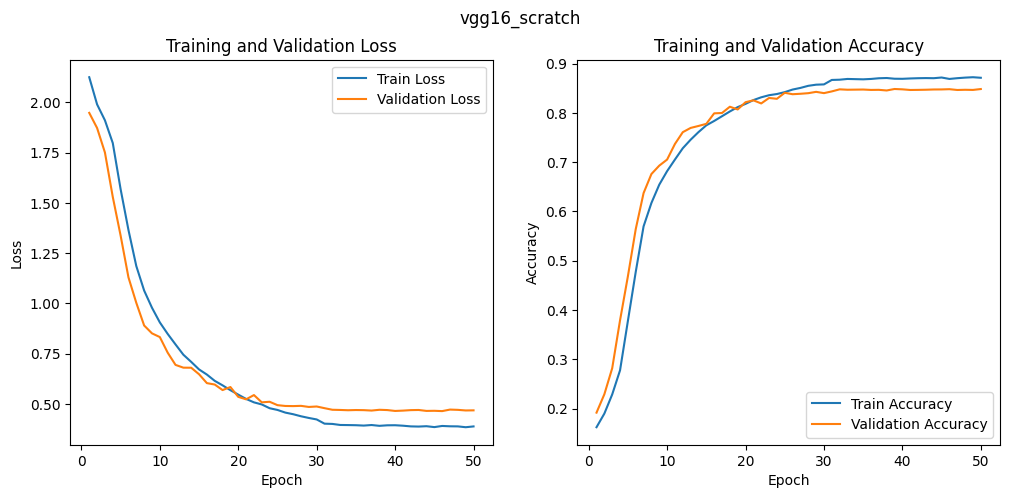

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
# Plot training and validation loss
plt.plot(range(1, num_epochs+1), train_loss_list, label='Train Loss')
plt.plot(range(1, num_epochs+1), valid_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
# Plot training and validation accuracy
plt.plot(range(1, num_epochs+1), train_accuracy_list, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), valid_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.suptitle(model_name)
plt.show()

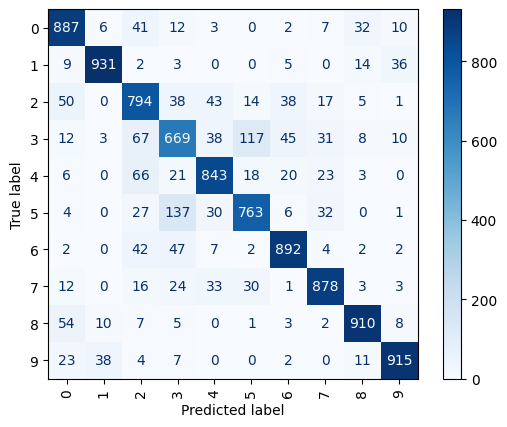

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

loaded_model = VGG16_NET()
loaded_model.load_state_dict(torch.load('/content/vgg16_scratch.pth'))
loaded_model.to(device)  # Move the loaded model to the same device as the data

# Test the loaded model
def test_loaded_model(model, test_dataloader, device):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_preds, all_labels

# Test the loaded model
all_preds, all_labels = test_loaded_model(loaded_model, testloader, device)

# Generate confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Display the confusion matrix using ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(all_labels))
cmd.plot(cmap='Blues', xticks_rotation='vertical')

# Show the plot
plt.show()